In [1]:
%matplotlib inline

import urllib.request
import io
import zipfile

from pathlib import Path
import os

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB

import igraph as ig

In [ ]:
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

#print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

#options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

#pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
#nx.draw(G, pos, **options)
#plt.show()

In [ ]:
#g = ig.Graph.Famous("petersen")
#ig.plot(g)

#g = ig.Graph.Erdos_Renyi(n=50, p=0.2, directed=False, loops=False)
#ig.plot(g)

In [ ]:
#karate = ig.Graph.Read_GraphML("/home/jossian/repository/tukey_depth/src/instances/zachary.graphml")
#ig.summary(karate)

#n = karate.vcount()
#print(n)

#m = karate.ecount()
#print(m)

#len(karate.cliques())

#len(karate.maximal_independent_vertex_sets())

#karate.independence_number()

#karate.distances(2)

In [2]:
# instances

#inst_="example"
#G = nx.Graph()
#list0 = [0,1,2,3,4,5]
#G.add_nodes_from(list0)
#G.add_edge(0,2)
#G.add_edge(1,2)
#G.add_edge(2,3)
#G.add_edge(3,4)
#G.add_edge(4,5)

#inst_="karate"
#G = nx.karate_club_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

#inst_="petersen"
#G = nx.petersen_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

#dim=50
#inst_=f"tree_{dim}"
#for id in range(1,11):
#    G = nx.random_tree(50)
#    nx.write_gml(G, f"../instances/{inst_}_{id}.gml.gz",stringizer=int)

#dim=500
#inst_=f"internet_graph_{dim}"
#for id in range(1,11):
#    G = nx.random_internet_as_graph(dim)
#    nx.write_gml(G, f"../instances/{inst_}_{id}.gml.gz")

# erdos_renyi_graph(n, p, seed=None, directed=False)
#G = nx.erdos_renyi_graph(50,0.1)

# barabasi_albert_graph(n, m, seed=None, initial_graph=None)
#G = nx.barabasi_albert_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

#dim=100
#inst_=f"erdos_renyi_{dim}"
#for id in range(1,11):
#    GI = ig.Graph.Erdos_Renyi(n=dim, p=0.2, directed=False, loops=False)
#    A = ig.Graph.get_edgelist(GI)
#    G = nx.Graph(A)
#    #G = ig.Graph.to_networkx(GI)
#    nx.write_gml(G, f"../instances/{inst_}_{id}.gml.gz",stringizer=int)

#inst_="les_miserables"
#G = nx.les_miserables_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

#inst_="dodecahedral_graph"
#G = nx.dodecahedral_graph()
#nx.write_gml(G, f"../instances/{inst_}.gml.gz")

In [35]:
G.nodes

NodeView(('Napoleon', 'Myriel', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Valjean', 'Labarre', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Listolier', 'Tholomyes', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'MmeBurgon', 'Jondrette', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup'))

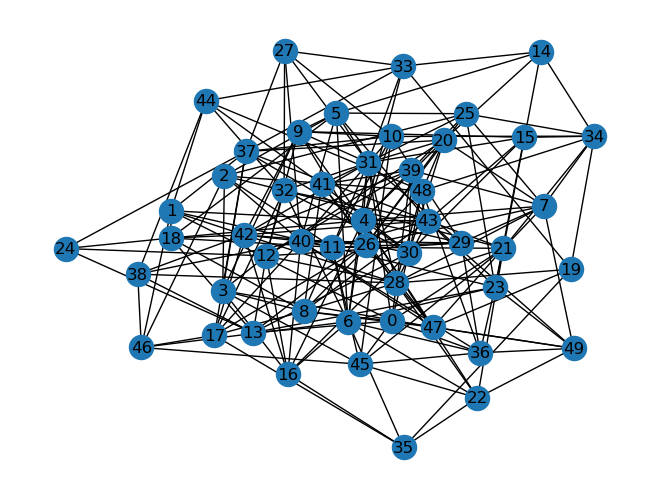

In [21]:
#ig.plot(GI)
#nx.draw_networkx_labels(G,pos=nx.spring_layout(G))
nx.draw(G,  with_labels = True)

In [43]:
nx.is_connected(G)

True

In [44]:
G.number_of_nodes()

625

In [45]:
G.number_of_edges()

20000

In [47]:
#H = nx.read_gml(f"../instances/{inst_}.gml",destringizer=int)
H = nx.read_gml(f"../instances/{inst_}.gml.gz",destringizer=int)

In [48]:
H.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [14]:
#instance

inst_="internet_graph"
dim_=200
table = pd.DataFrame()
for id_ in range(1,11):
    list = []
    instance_=f"{inst_}_{dim_}_{id_}"
    G = nx.read_gml(f"../instances/{inst_}/{dim_}/{instance_}.gml.gz",destringizer=int)
    dados = pd.DataFrame({
        'id':id_,
        'nodes':G.number_of_nodes(),
        'edges':G.number_of_edges()
    },index=["teste"]
    )
    table = pd.concat([table, dados], ignore_index=True)

In [17]:
table

,id,nodes,edges
0,1,200,283
1,2,200,284
2,3,200,285
3,4,200,273
4,5,200,283
5,6,200,280
6,7,200,290
7,8,200,289
8,9,200,279
9,10,200,281


In [16]:
print(table[['id',"nodes","edges"]].to_latex(index=False,float_format="%.1f"))

\begin{tabular}{rrr}
\toprule
 id &  nodes &  edges \\
\midrule
  1 &    200 &    283 \\
  2 &    200 &    284 \\
  3 &    200 &    285 \\
  4 &    200 &    273 \\
  5 &    200 &    283 \\
  6 &    200 &    280 \\
  7 &    200 &    290 \\
  8 &    200 &    289 \\
  9 &    200 &    279 \\
 10 &    200 &    281 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_100522/2746909555.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table[['id',"nodes","edges"]].to_latex(index=False,float_format="%.1f"))
